In [1]:
from pysb import *
from pysb.export import export
from pysb.bng import generate_network, generate_equations
from pysb.pathfinder import set_path
from pysb.simulator import ScipyOdeSimulator, BngSimulator
from pylab import linspace, plot, xlabel, ylabel, show

import seaborn
import matplotlib.pyplot as plt

palette = seaborn.color_palette('colorblind')

set_path('bng', '/opt/git-repositories/bionetgen.RuleWorld/bng2/')

In [2]:
Model()

<Model '_interactive_' (monomers: 0, rules: 0, parameters: 0, expressions: 0, compartments: 0) at 0x7f7891ba5c18>

In [3]:
Monomer('prot', ['name', 'up', 'dw'], { 'name' : ['BETAGALACTOSID_MONOMER', 'GALACTOACETYLTRAN_MONOMER']})
Monomer('cplx', ['name'], { 'name' : ['BETAGALACTOSID_DIMER', 'BETAGALACTOSID_CPLX']})

Monomer('cplx', ['name'], {'name': ['BETAGALACTOSID_DIMER', 'BETAGALACTOSID_CPLX']})

In [4]:
Initial(prot(name = 'BETAGALACTOSID_MONOMER', up = None, dw = None), Parameter('t0', 12))
Initial(prot(name = 'GALACTOACETYLTRAN_MONOMER', up = None, dw = None), Parameter('t0_', 12))

Initial(prot(name='GALACTOACETYLTRAN_MONOMER', up=None, dw=None), t0_)

In [5]:
Rule('complex_assembly_rule_0', 
prot(name = 'BETAGALACTOSID_MONOMER', up = None, dw = None) + prot(name = 'BETAGALACTOSID_MONOMER', up = None, dw = None) | 
prot(name = 'BETAGALACTOSID_MONOMER', up = 1, dw = None) % prot(name = 'BETAGALACTOSID_MONOMER', up = None, dw = 1), 
Parameter('fwd_complex_assembly_rule_0', 1), Parameter('rvs_complex_assembly_rule_0', 0))

Rule('complex_assembly_rule_1', 
prot(name = 'BETAGALACTOSID_MONOMER', up = 1, dw = None) % prot(name = 'BETAGALACTOSID_MONOMER', up = None, dw = 1) + prot(name = 'BETAGALACTOSID_MONOMER', up = 1, dw = None) % prot(name = 'BETAGALACTOSID_MONOMER', up = None, dw = 1) | 
prot(name = 'BETAGALACTOSID_MONOMER', up = 1, dw = None) % prot(name = 'BETAGALACTOSID_MONOMER', up = 2, dw = 1) % prot(name = 'BETAGALACTOSID_MONOMER', up = 3, dw = 2) % prot(name = 'BETAGALACTOSID_MONOMER', up = None, dw = 3), 
Parameter('fwd_complex_assembly_rule_1', 1), Parameter('rvs_complex_assembly_rule_1', 0))

Rule('complex_assembly_rule_2', 
prot(name = 'GALACTOACETYLTRAN_MONOMER', up = None, dw = None) + prot(name = 'GALACTOACETYLTRAN_MONOMER', up = None, dw = None) | 
prot(name = 'GALACTOACETYLTRAN_MONOMER', up = 1, dw = None) % prot(name = 'GALACTOACETYLTRAN_MONOMER', up = None, dw = 1), 
Parameter('fwd_complex_assembly_rule_2', 1), Parameter('rvs_complex_assembly_rule_2', 0))

Rule('complex_assembly_rule_3', 
prot(name = 'GALACTOACETYLTRAN_MONOMER', up = None, dw = None) + prot(name = 'GALACTOACETYLTRAN_MONOMER', up = 1, dw = None) % prot(name = 'GALACTOACETYLTRAN_MONOMER', up = None, dw = 1) | 
prot(name = 'GALACTOACETYLTRAN_MONOMER', up = 1, dw = None) % prot(name = 'GALACTOACETYLTRAN_MONOMER', up = 2, dw = 1) % prot(name = 'GALACTOACETYLTRAN_MONOMER', up = None, dw = 2), 
Parameter('fwd_complex_assembly_rule_3', 1), Parameter('rvs_complex_assembly_rule_3', 0))

Rule('complex_assembly_rule_3', prot(name='GALACTOACETYLTRAN_MONOMER', up=None, dw=None) + prot(name='GALACTOACETYLTRAN_MONOMER', up=1, dw=None) % prot(name='GALACTOACETYLTRAN_MONOMER', up=None, dw=1) | prot(name='GALACTOACETYLTRAN_MONOMER', up=1, dw=None) % prot(name='GALACTOACETYLTRAN_MONOMER', up=2, dw=1) % prot(name='GALACTOACETYLTRAN_MONOMER', up=None, dw=2), fwd_complex_assembly_rule_3, rvs_complex_assembly_rule_3)

In [6]:
cplx_lacZ = prot(name = 'BETAGALACTOSID_MONOMER', up = 1, dw = None) % prot(name = 'BETAGALACTOSID_MONOMER', up = 2, dw = 1) % prot(name = 'BETAGALACTOSID_MONOMER', up = 3, dw = 2) % prot(name = 'BETAGALACTOSID_MONOMER', up = None, dw = 3)
cplx_lacA = prot(name = 'GALACTOACETYLTRAN_MONOMER', up = 1, dw = None) % prot(name = 'GALACTOACETYLTRAN_MONOMER', up = 2, dw = 1) % prot(name = 'GALACTOACETYLTRAN_MONOMER', up = None, dw = 2) 

Observable('free_lacZ', prot(name = 'BETAGALACTOSID_MONOMER', up = None, dw = None))
Observable('cplx_lacZ', cplx_lacZ)
Observable('free_lacA', prot(name = 'GALACTOACETYLTRAN_MONOMER', up = None, dw = None))
Observable('cplx_lacA', cplx_lacA)

Observable('cplx_lacA', prot(name='GALACTOACETYLTRAN_MONOMER', up=1, dw=None) % prot(name='GALACTOACETYLTRAN_MONOMER', up=2, dw=1) % prot(name='GALACTOACETYLTRAN_MONOMER', up=None, dw=2))

In [7]:
with open('Model4 - lactose PPI.kappa', 'w') as outfile:
    outfile.write(export(model, 'kappa'))

In [8]:
generate_network(model)
generate_equations(model)

In [9]:
runs = 20
# data1 = ScipyOdeSimulator(model, linspace(0, 100, 200)).run().dataframe
data1 = BngSimulator(model, linspace(0, 5, 201)).run(method = 'ode').dataframe
data2 = BngSimulator(model, linspace(0, 5, 201)).run(method = 'ssa', n_runs = runs).dataframe

data = []
for i in range(0,runs):
    data.append(data2.xs(i))

avrg = 0
for i in range(0,runs):
    avrg += data[i]
avrg = avrg / runs

stdv = []
for i in range(0,runs):
    stdv = (data[i] - avrg)**2
stdv = (stdv / (runs-1))**0.5

data2 = data[0]

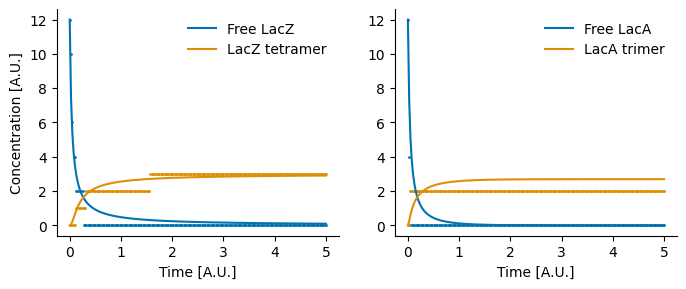

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (4*2, 3*1), dpi = 100)

ax[0].plot(data1.index, data1['free_lacZ'], label = r'Free LacZ', c = palette[0])
ax[0].scatter(data2.index, data2['free_lacZ'], s = 1, color = palette[0])
ax[0].plot(data1.index, data1['cplx_lacZ'], label = r'LacZ tetramer', c = palette[1])
ax[0].scatter(data2.index, data2['cplx_lacZ'], s = 1, color = palette[1])

ax[1].plot(data1.index, data1['free_lacA'], label = r'Free LacA', c = palette[0])
ax[1].scatter(data2.index, data2['free_lacA'], s = 1, color = palette[0])
ax[1].plot(data1.index, data1['cplx_lacA'], label = r'LacA trimer', c = palette[1])
ax[1].scatter(data2.index, data2['cplx_lacA'], s = 1, color = palette[1])

ax[0].set_xlabel('Time [A.U.]')
ax[0].set_ylabel('Concentration [A.U.]')
ax[0].legend(frameon = False)

ax[1].set_xlabel('Time [A.U.]')
ax[1].legend(frameon = False)

seaborn.despine()
plt.savefig('ppi_network_test.png', format = 'png', bbox_inches = 'tight', dpi = 300)
plt.show()

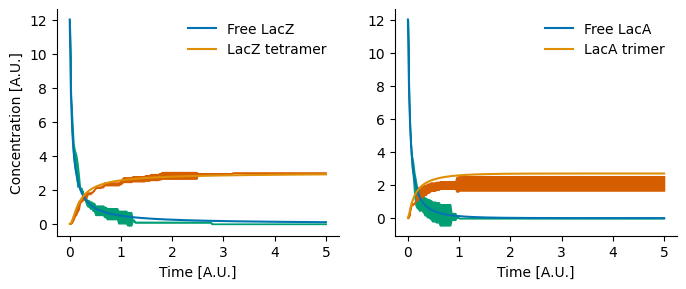

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (4*2, 3*1), dpi = 100)

ax[0].plot(data1.index, data1['free_lacZ'], label = r'Free LacZ', c = palette[0])
ax[0].plot(data1.index, data1['cplx_lacZ'], label = r'LacZ tetramer', c = palette[1])
ax[0].fill_between(avrg.index, 
                   avrg['free_lacZ'] + stdv['free_lacZ'], 
                   avrg['free_lacZ'] - stdv['free_lacZ'], **{'color' : palette[2]})
ax[0].fill_between(avrg.index, 
                   avrg['cplx_lacZ'] + stdv['cplx_lacZ'], 
                   avrg['cplx_lacZ'] - stdv['cplx_lacZ'], **{'color' : palette[3]})

ax[1].plot(data1.index, data1['free_lacA'], label = r'Free LacA', c = palette[0])
ax[1].plot(data1.index, data1['cplx_lacA'], label = r'LacA trimer', c = palette[1])
ax[1].fill_between(avrg.index, 
                   avrg['free_lacA'] + stdv['free_lacA'], 
                   avrg['free_lacA'] - stdv['free_lacA'], **{'color' : palette[2]})
ax[1].fill_between(avrg.index, 
                   avrg['cplx_lacA'] + stdv['cplx_lacA'], 
                   avrg['cplx_lacA'] - stdv['cplx_lacA'], **{'color' : palette[3]})

ax[0].set_xlabel('Time [A.U.]')
ax[0].set_ylabel('Concentration [A.U.]')
ax[0].legend(frameon = False)

ax[1].set_xlabel('Time [A.U.]')
ax[1].legend(frameon = False)

seaborn.despine()
plt.savefig('ppi_network_test_stdv.png', format = 'png', bbox_inches = 'tight', dpi = 300)
plt.show()